In [1]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline
from pandas import json_normalize
import sqlite3
import matplotlib.pyplot as plt
from tqdm import tqdm

# elenanereiss/bert-german-ler

In [14]:
tokenizer = AutoTokenizer.from_pretrained("elenanereiss/bert-german-ler")
model = AutoModelForTokenClassification.from_pretrained("elenanereiss/bert-german-ler")
nlp = pipeline("ner", model=model, tokenizer=tokenizer)


/Users/dominikpichler/Documents/Git/OpenSource/Balmung/ER-NLP/.venv/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [2]:
def run_query(database_path, query):
    # Connect to the SQLite database
    # If the database does not exist, it will be created
    connection = sqlite3.connect(database_path)
    
    try:
        # Create a cursor object using the connection
        cursor = connection.cursor()
        
        # Execute the SQL query
        cursor.execute(query)
        
        # Fetch all results from the executed query
        results = cursor.fetchall()
        
        # Turning list of tuples to list of strings for further processing
        return [str(t[0]) for t in results]

            
    except sqlite3.Error as e:
        print(f"An error occurred: {e}")
        
    finally:
        
        # Close the connection to the database
        if connection:
            connection.close()

In [3]:

database_path = 'openregister.db'  # Path to your SQLite database file
query = 'SELECT name FROM company LIMIT 100;'  # Replace 'your_table' with your actual table name

company_names = run_query(database_path, query)



In [29]:
list_nlp_results = []
for company_name in tqdm(company_names):
    
    list_nlp_results.append(nlp(company_name))
    
flattened_data = [item for result in list_nlp_results for item in result]
print(flattened_data)

100%|██████████| 10000/10000 [09:08<00:00, 18.24it/s]IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)




In [30]:
df = json_normalize(flattened_data)
df.to_csv('company_name_HuggingFace_GoogleBert.csv')


Number of elements per entity:
entity
I-UN     55595
B-UN      9923
I-ORG     4104
I-RR      1436
I-PER      879
I-MRK      714
B-RR       608
B-ORG      449
B-PER      215
B-ST       131
B-MRK       89
I-VT        75
I-STR       53
I-RS        43
I-LIT       28
B-STR       18
I-GS        14
B-LD        13
B-VT         8
B-RS         5
I-GRT        5
I-ST         5
B-GRT        2
B-GS         2
B-INN        1
B-LIT        1
Name: count, dtype: int64


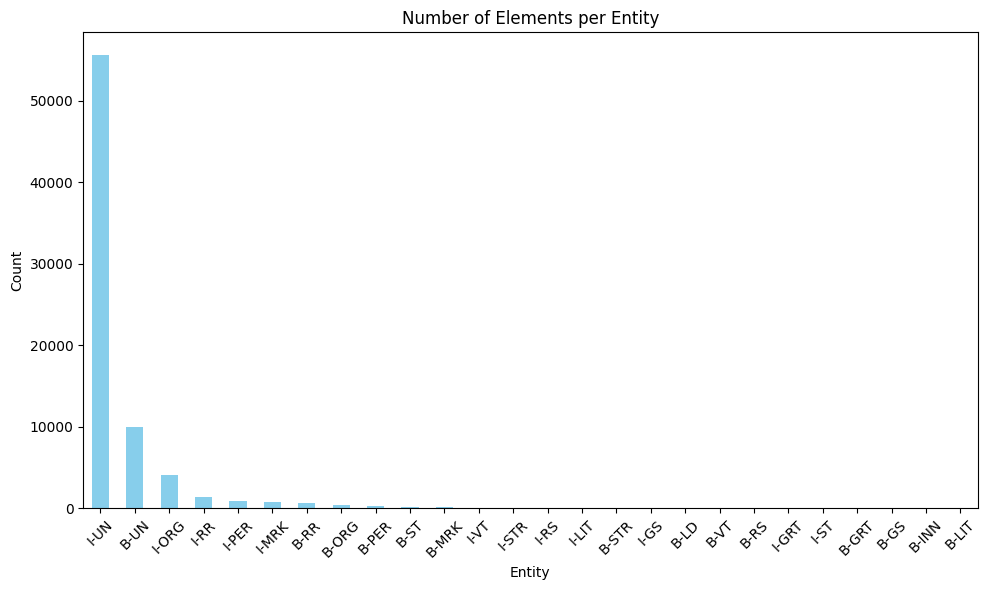

In [31]:
entity_counts = df['entity'].value_counts()

# Print the counts
print("Number of elements per entity:")
print(entity_counts)

# Plot a bar chart of the counts
plt.figure(figsize=(10, 6))
entity_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Elements per Entity')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

looks like it is not working too well .... 

In [37]:
df_personen = df[df['entity'] == 'I-PER']
df_personen.to_csv('personen.csv', index=False)

## google-bert/bert-base-german-cased  


In [4]:
tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-german-cased")
model = AutoModelForTokenClassification.from_pretrained("google-bert/bert-base-german-cased")
nlp = pipeline("ner", model=model, tokenizer=tokenizer)


/Users/dominikpichler/Documents/Git/OpenSource/Balmung/ER-NLP/.venv/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForTokenClassification were not initialized from the model checkpoint at google-bert/bert-base-german-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [5]:
list_nlp_results = []
for company_name in tqdm(company_names):
    
    list_nlp_results.append(nlp(company_name))
    
flattened_data = [item for result in list_nlp_results for item in result]

df = json_normalize(flattened_data)
df.to_csv('company_name_HuggingFace_GoogleBert.csv')


100%|██████████| 100/100 [00:06<00:00, 14.51it/s]


Number of elements per entity:
entity
LABEL_1    902
LABEL_0     19
Name: count, dtype: int64


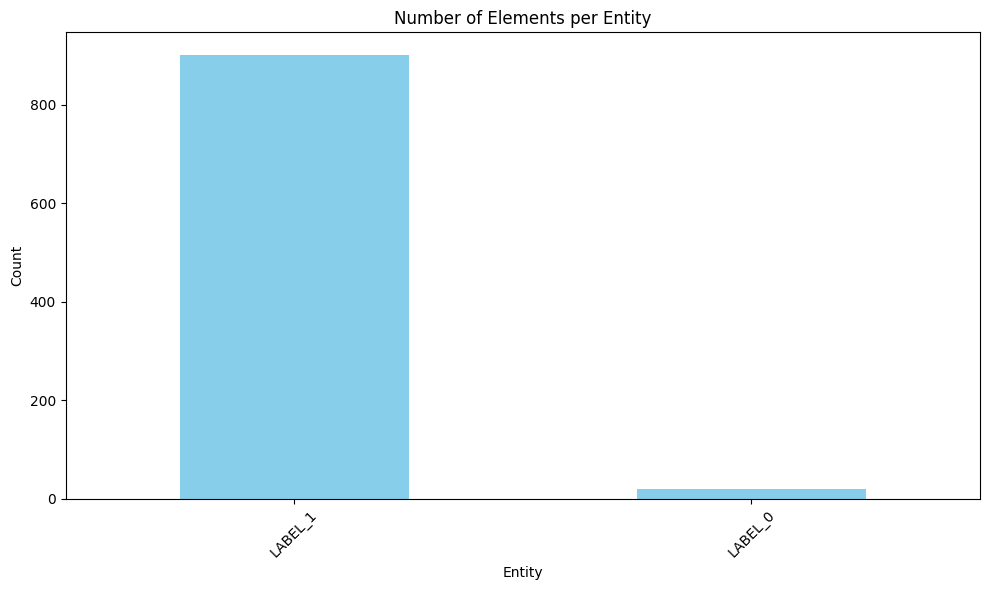

In [7]:
# Plot a bar chart of the counts
entity_counts = df['entity'].value_counts()

# Print the counts
print("Number of elements per entity:")
print(entity_counts)

# Plot a bar chart of the counts
plt.figure(figsize=(10, 6))
entity_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Elements per Entity')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
df[df['entity'] == 'LABEL_1']


,entity,score,index,word,start,end
0,LABEL_1,0.597271,1,ol,0,2
1,LABEL_1,0.765606,2,##ly,2,4
2,LABEL_1,0.759281,3,U,5,6
3,LABEL_1,0.820037,4,##G,6,7
4,LABEL_1,0.749424,5,(,8,9
...,...,...,...,...,...,...
916,LABEL_1,0.607506,4,Freude,8,14
917,LABEL_1,0.516354,5,##n,14,15
918,LABEL_1,0.717766,6,##berger,15,21
919,LABEL_1,0.712597,7,Maschinenbau,22,34
